<h1>K Nearest neighbor for Classification</h1>
<h5>Contents :</h5>
1) Introduction to KNN<br>
2) When to use KNN?<br>
3) Working of KNN with example<br>
4) Usecase Implementation<br>
5) Pros and Cons<br>
6) Optimization<br>
7) Inferences<br>


<h3> 1. Introduction to KNN </h3>


i) Supervised ML Algorithm <br>
ii) k number of nearest neighbors are selected and classified based on the majority.<br>
iii) Non parametric and lazy learning algorithm<br>
iv) Example: Determining whether a person is underweight or overweight based on his/her height and weight


<h3> 2. When to use KNN? </h3>


i) Labelled outcome<br>
ii) Noise - free data<br>
iii) Suitable for small datasets.

<h3> 3. Working of KNN with example</h3>



![title](images/knn_working.png)<br>

As shown in the above figure,<br>
1) Calculate distance (e.g. Euclidean distance, Hamming distance, etc.)<br>
2) Find k closest neighbors<br>
3) Get the most frequent label from the top k closest neighbors.


<h3> 4. Usecase Implementation </h3>

In [240]:
#import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')
import sklearn
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_score,f1_score
from sklearn.preprocessing import StandardScaler
import time

<h3>Loading Data</h3>

In [2]:
#load the data
data= pd.read_csv('Data/diabetes.csv')

In [3]:
#shape 
data.shape #(768, 9)

(768, 9)

In [4]:
#data summary
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [5]:
#data description
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
#data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<h3>Data exploration</h3>

Outcome
0    500
1    268
dtype: int64


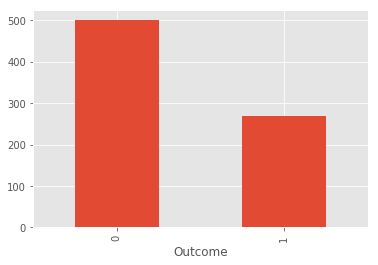

In [396]:
#no. of entries for individual outcome variable 
print(data.groupby('Outcome').size())
data.groupby('Outcome').size().plot.bar()

#### Check for patients with gluocse > 200 ( possibility of high sugar)

In [265]:
data.query('Glucose>200')['Age'].count()

0

#### Check for patients with high BP (normal : 60-90)

In [271]:
data.query('BloodPressure>90').count()

38

#### Outcome of High BP patients

In [393]:
BP_high=data.query('BloodPressure>90')
result=BP_high.groupby('Outcome')['Age'].count()
result

Outcome
0    20
1    18
Name: Age, dtype: int64

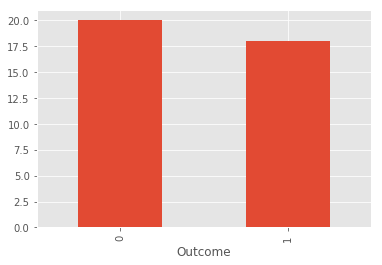

In [394]:
result.plot.bar()

#### Check for Skin thickness > 23 and its outcome (normal:  23)

In [391]:
res=data.query('SkinThickness>23').groupby('Outcome')['Age'].count()
res


Outcome
0    216
1    153
Name: Age, dtype: int64

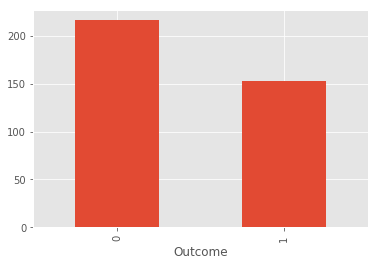

In [390]:
res.plot.bar()

#### Check for abnormal insulin level ( normal : 16- 166)

Outcome
0    300
1    208
Name: Age, dtype: int64


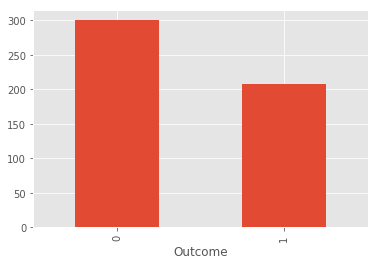

In [402]:
result1=data.query('Insulin<16 | Insulin>166').groupby('Outcome')['Age'].count()
print(result1)
result1.plot.bar()

#### Check for BMI 

In [ ]:
data_copy=data.copy()

In [422]:
data_copy['Weight_label'] = np.where((data_copy['BMI']>=18.5) & (data_copy['BMI']<=25) , 'Normal',np.where((data_copy['BMI']>25) & (data_copy['BMI']<30),'Overweight','Obese'))                 

Outcome
0    266
1    221
Name: Age, dtype: int64


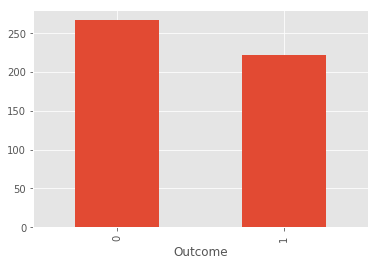

In [427]:
res1=data_copy.query('Weight_label=="Obese"').groupby('Outcome')['Age'].count()
print(res1)
res1.plot.bar()

#### vizualization

In [ ]:
#Data visualization
#-----histogram
#-----scater


Outcome
0    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
1    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
dtype: object

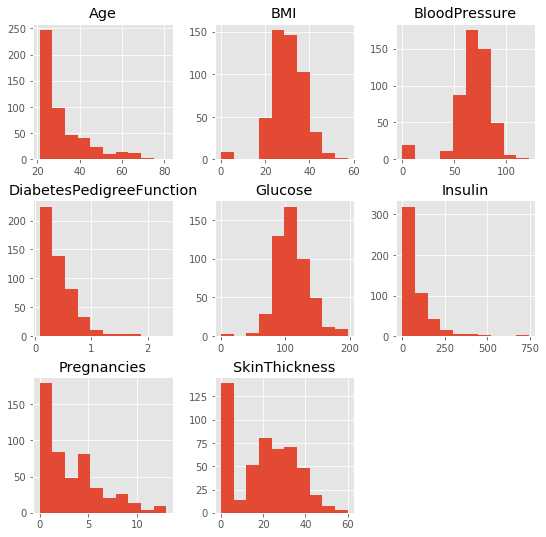

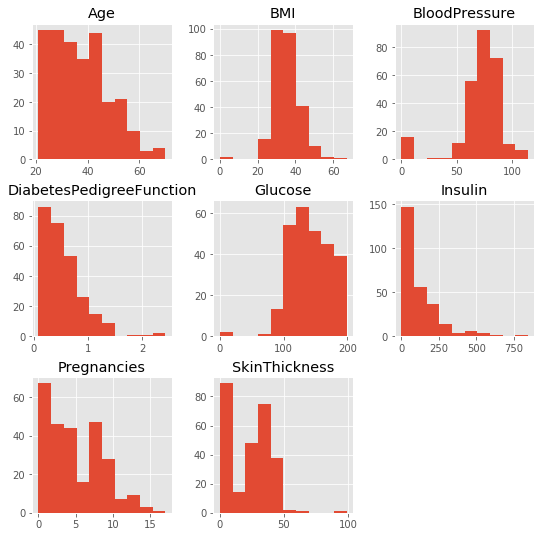

In [8]:
#histogram of 8 features w.r.t outcome
data.groupby('Outcome').hist(figsize=(9, 9))


In [9]:
#correlation
#np.corrcoef(data)
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


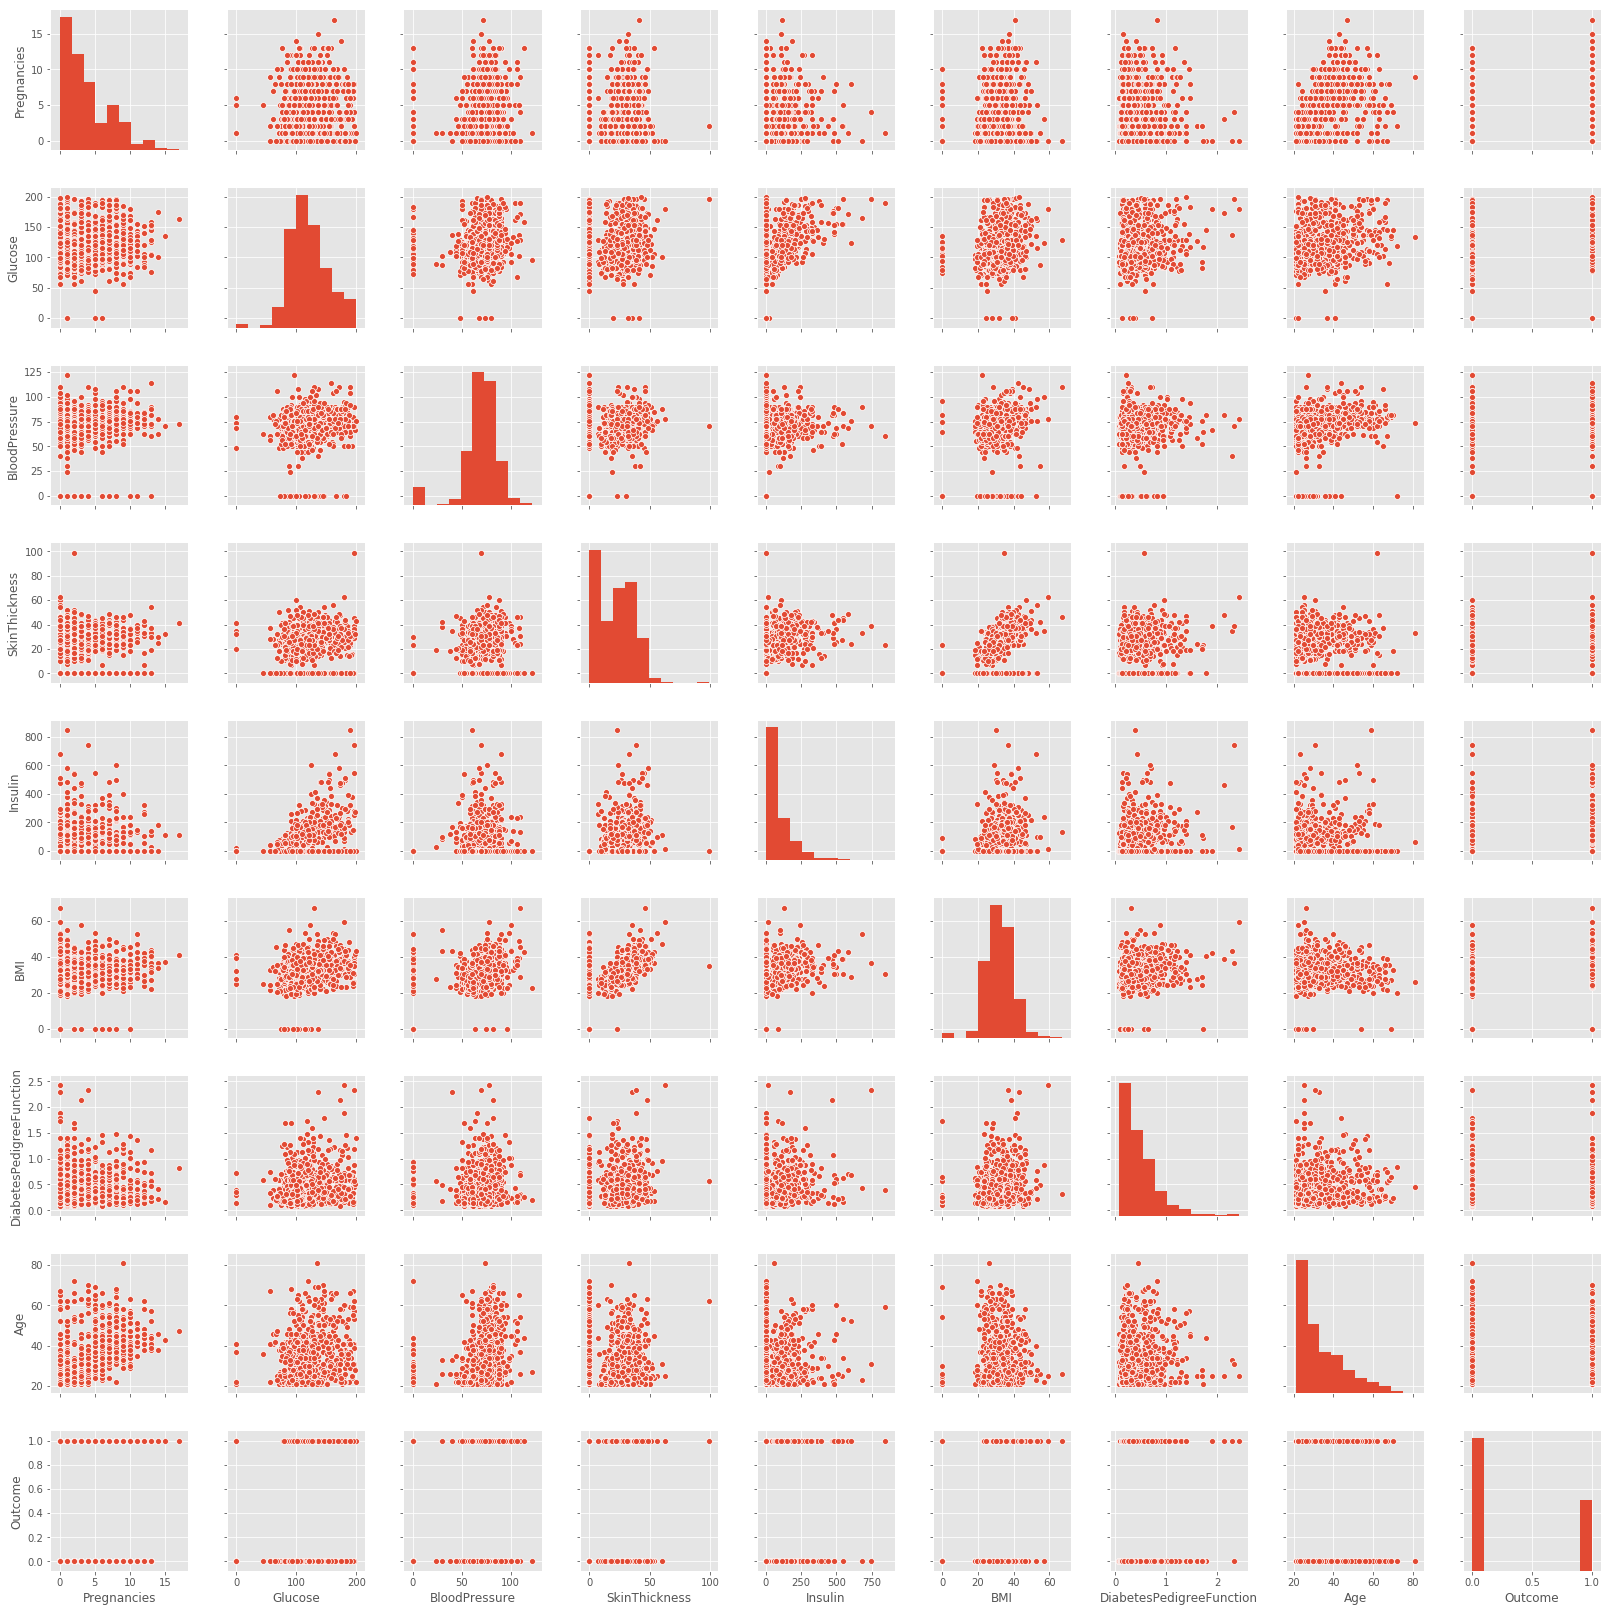

In [157]:
sns.pairplot(data)
plt.savefig('images/pairplot.png')

<h4>Data cleaning</h4>

In [63]:
#data cleaning
#-------missing values
#-------outliers


In [11]:
#missing val
#print(data.isnull().values.any())#False ----no missingvalues
print(data.isnull().sum())
#print(data.isna().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [91]:
#outliers

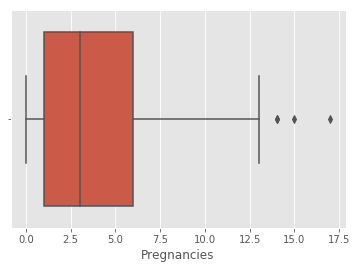

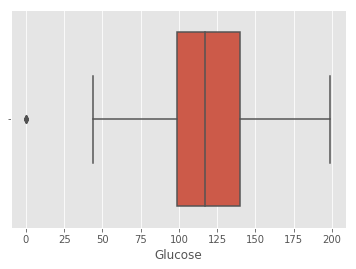

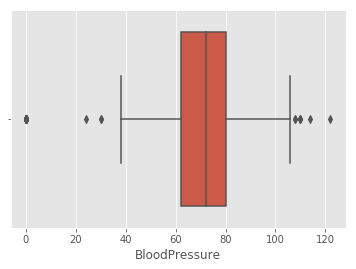

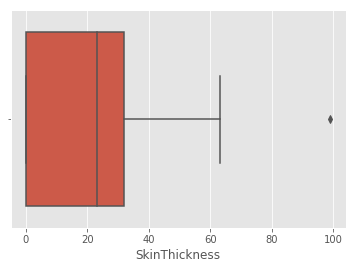

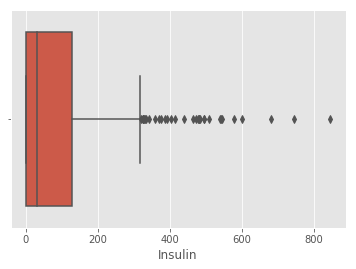

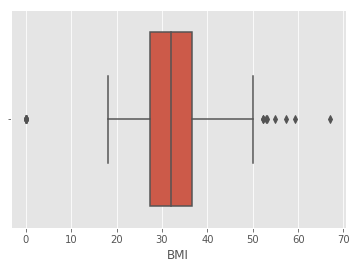

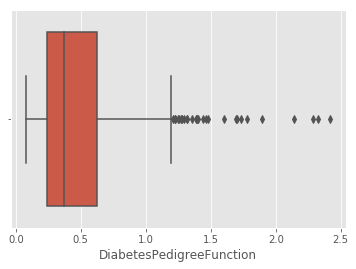

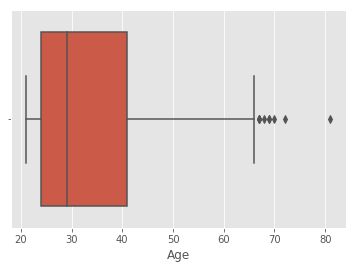

In [12]:
#detect outliers using boxplot
for i in data.columns:
    #print(i)
    if(i=='Outcome'):
        break
    boxplt=sns.boxplot(data[i])
    plt.show() 

In [123]:
#INvalid values for BP
print('BP invalid values (zero) : ',data[data['BloodPressure']==0]['Age'].count())
print('Invalid BP w.rt. outcome : ',data[data['BloodPressure']==0].groupby('Outcome')['Age'].count())
#INvalid values for Glucose
print('Glucose invalid values (zero) : ',data[data['Glucose']==0]['Age'].count())
print('Invalid Glucose w.rt. outcome : ',data[data['Glucose']==0].groupby('Outcome')['Age'].count())
#INvalid values for Skin thickness
print('Skin thickness invalid values (zero) : ',data[data['SkinThickness']==0]['Age'].count())
print('Invalid Skin thickness w.rt. outcome : ',data[data['SkinThickness']==0].groupby('Outcome')['Age'].count())
#INvalid values for BMI
print('BMI invalid values (zero) : ',data[data['BMI']==0]['Age'].count())
print('Invalid BMI w.rt. outcome : ',data[data['BMI']==0].groupby('Outcome')['Age'].count())
#INvalid values for Insulin
print('Insulin invalid values (zero) : ',data[data['Insulin']==0]['Age'].count())
print('Invalid Insulin w.rt. outcome : ',data[data['Insulin']==0].groupby('Outcome')['Age'].count())

BP invalid values (zero) :  35
Invalid BP w.rt. outcome :  Outcome
0    19
1    16
Name: Age, dtype: int64
Glucose invalid values (zero) :  5
Invalid Glucose w.rt. outcome :  Outcome
0    3
1    2
Name: Age, dtype: int64
Skin thickness invalid values (zero) :  227
Invalid Skin thickness w.rt. outcome :  Outcome
0    139
1     88
Name: Age, dtype: int64
BMI invalid values (zero) :  11
Invalid BMI w.rt. outcome :  Outcome
0    9
1    2
Name: Age, dtype: int64
Insulin invalid values (zero) :  374
Invalid Insulin w.rt. outcome :  Outcome
0    236
1    138
Name: Age, dtype: int64


In [13]:
#remove outliers
data_cleaned=data[(data['Glucose']!=0) & (data['BloodPressure']!=0) & (data['BMI']!=0)]
# Calculate the median value for Skin thickness
median_st = data_cleaned['SkinThickness'].median()
# Substitute it in the Skin thickness column of the
# dataset where values are 0
data_cleaned['SkinThickness'] = data['SkinThickness'].replace(to_replace=0, value=median_st)
# Calculate the median value for Insulin
median_ins = data_cleaned['Insulin'].median()
# Substitute it in the insulin column of the
# dataset where values are 0
data_cleaned['Insulin'] = data['Insulin'].replace(to_replace=0, value=median_ins)

c:\users\raghasrir\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
c:\users\raghasrir\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [14]:
#reduced shape from 768 to 724
data_cleaned.shape

(724, 9)

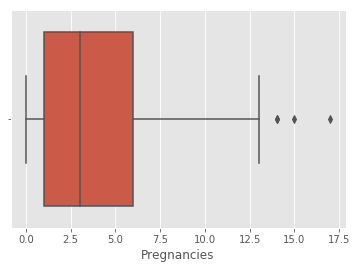

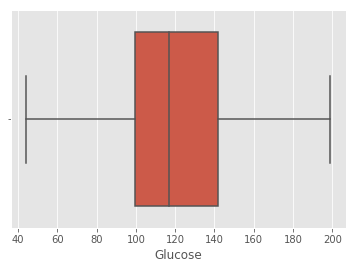

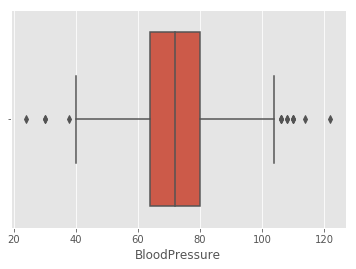

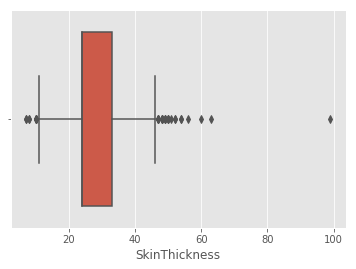

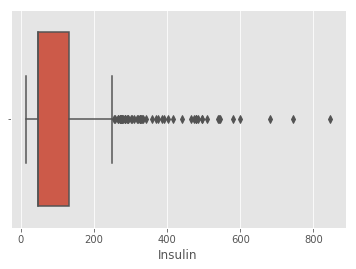

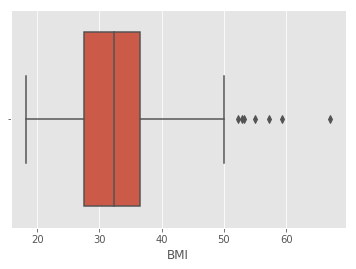

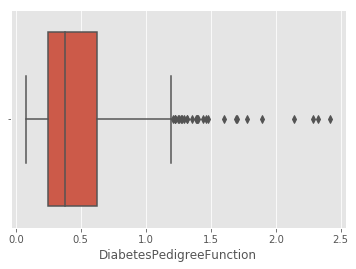

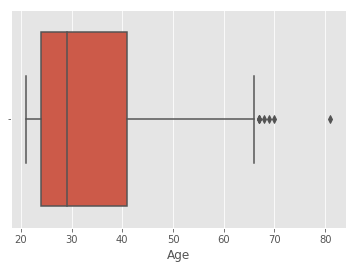

In [15]:
#detect outliers using boxplot
for i in data_cleaned.columns:
    #print(i)
    if(i=='Outcome'):
        break
    boxplt=sns.boxplot(data_cleaned[i])
    plt.show() 

<h4>Feature selection and scaling</h4>

In [ ]:
#-------feature scaling
#-------feature selection

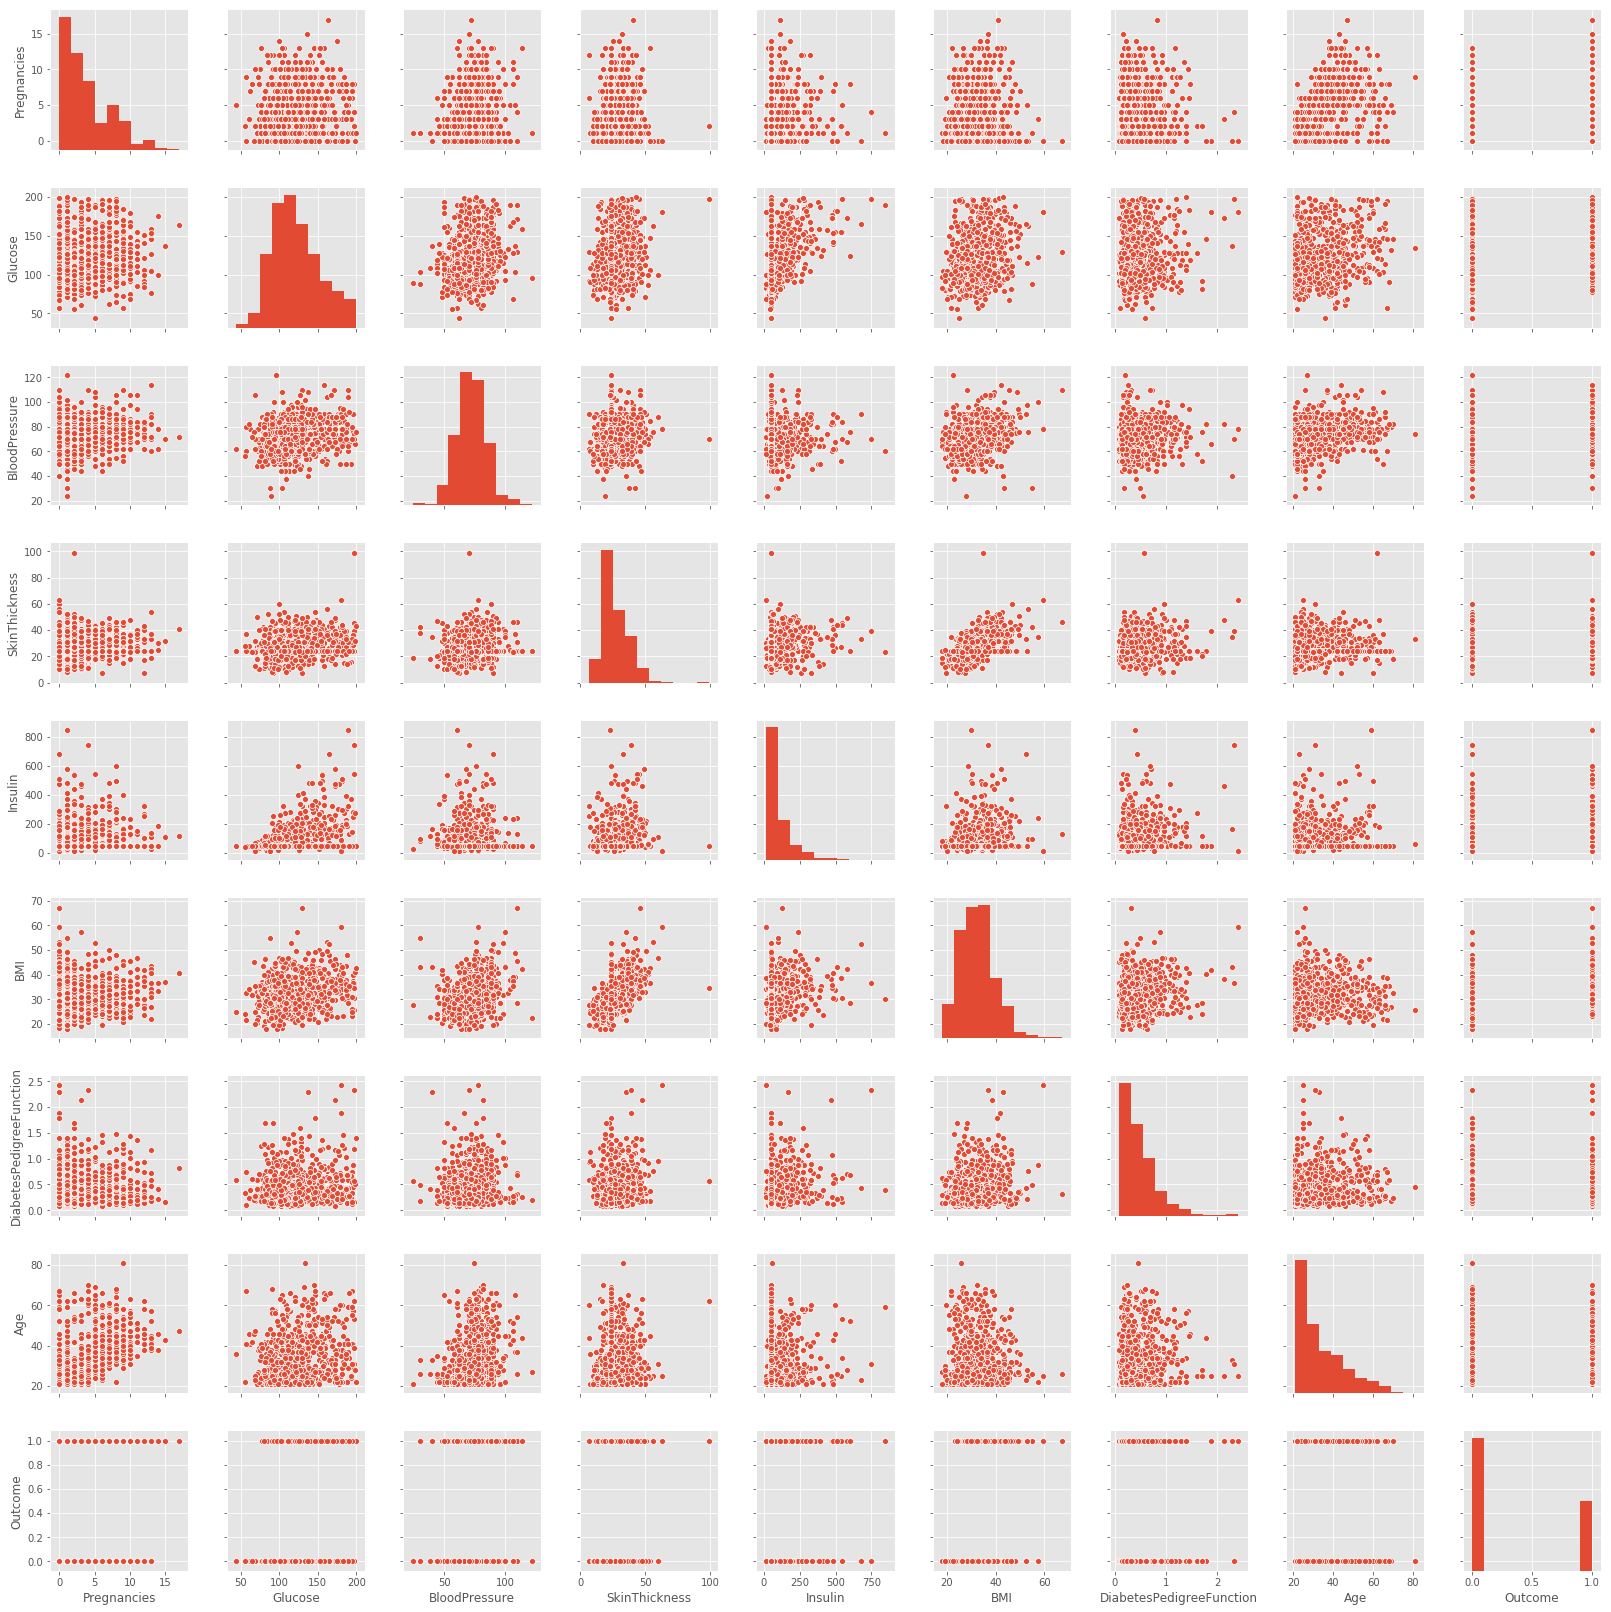

In [169]:
sns.pairplot(data_cleaned)
plt.savefig('images/pairplotCleaned.png')

In [ ]:
#no features can be deleted

In [17]:
feature_names = data_cleaned.columns[:-1]
X = data_cleaned[feature_names]
print(X.shape)
y = data_cleaned['Outcome']
print(y.shape)


(724, 8)
(724,)


In [213]:
#feature scaling

In [18]:
scaler = StandardScaler()  
scaler.fit(X)

X_scaled = scaler.transform(X)  

c:\users\raghasrir\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\raghasrir\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


In [19]:
df = pd.DataFrame(data=X_scaled,columns=feature_names)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.635022,0.849933,-0.032378,0.773458,-0.570240,0.164562,0.458421,1.416075
1,-0.852861,-1.200262,-0.517370,0.128192,-0.570240,-0.852262,-0.372691,-0.199947
2,1.230175,1.988930,-0.679035,-0.409530,-0.570240,-1.331622,0.593928,-0.114893
3,-0.852861,-1.070091,-0.517370,-0.517075,-0.121888,-0.634371,-0.926765,-1.050485
4,-1.150438,0.491962,-2.619006,0.773458,0.599372,1.544537,5.460146,-0.029839


In [20]:
y=y.reset_index(drop=True)
df['Outcome']=y
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.635022,0.849933,-0.032378,0.773458,-0.570240,0.164562,0.458421,1.416075,1
1,-0.852861,-1.200262,-0.517370,0.128192,-0.570240,-0.852262,-0.372691,-0.199947,0
2,1.230175,1.988930,-0.679035,-0.409530,-0.570240,-1.331622,0.593928,-0.114893,1
3,-0.852861,-1.070091,-0.517370,-0.517075,-0.121888,-0.634371,-0.926765,-1.050485,0
4,-1.150438,0.491962,-2.619006,0.773458,0.599372,1.544537,5.460146,-0.029839,1
5,0.337445,-0.191436,0.129287,-0.409530,-0.570240,-0.997523,-0.824382,-0.285001,0
6,-0.257708,-1.428061,-1.810684,0.450825,-0.180369,-0.213116,-0.682852,-0.625216,1
7,-0.555284,2.444529,-0.194042,1.848903,4.254411,-0.285746,-0.953867,1.671237,1
8,0.039869,-0.386693,1.584265,-0.409530,-0.570240,0.745604,-0.854495,-0.285001,0
9,1.825328,1.500788,0.129287,-0.409530,-0.570240,0.803708,0.187406,0.055214,1


In [156]:
#scaterplot
#plotting highly correlated features

In [21]:
f1=df[feature_names[0]]
f2=df[feature_names[1]]
f3=df[feature_names[2]]
f4=df[feature_names[3]]
f5=df[feature_names[4]]
f6=df[feature_names[5]]
f7=df[feature_names[6]]
f8=df[feature_names[7]]

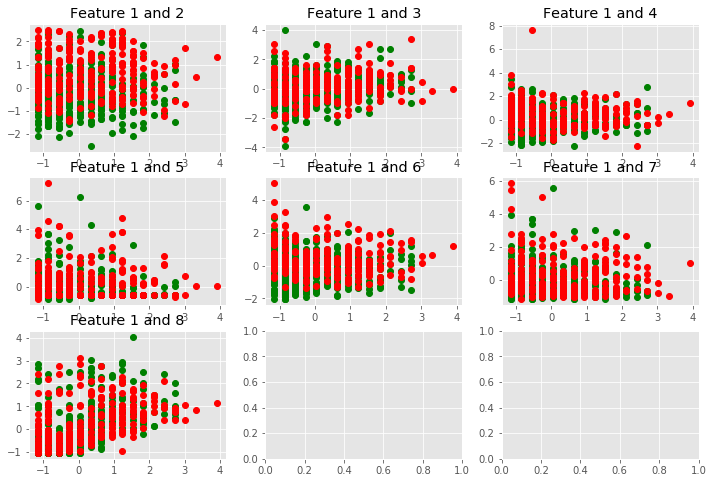

In [115]:
#Pregnancies
colors = ['g','r']

f,ax = plt.subplots(3,3,figsize=(12,8))

comb = combinations(feature_names, 2)
    
ax[0][0].set_title('Feature 1 and 2')
ax[0][1].set_title('Feature 1 and 3')
ax[0][2].set_title('Feature 1 and 4')
ax[1][0].set_title('Feature 1 and 5')
ax[1][1].set_title('Feature 1 and 6')
ax[1][2].set_title('Feature 1 and 7')
ax[2][0].set_title('Feature 1 and 8')

for c in np.unique(y):
    ax[0][0].plot(f1[y==c],f2[y==c],'o',color=colors[int(c)])
    ax[0][1].plot(f1[y==c],f3[y==c],'o',color=colors[int(c)])
    ax[0][2].plot(f1[y==c],f4[y==c],'o',color=colors[int(c)])
    ax[1][0].plot(f1[y==c],f5[y==c],'o',color=colors[int(c)])
    ax[1][1].plot(f1[y==c],f6[y==c],'o',color=colors[int(c)])
    ax[1][2].plot(f1[y==c],f7[y==c],'o',color=colors[int(c)])
    ax[2][0].plot(f1[y==c],f8[y==c],'o',color=colors[int(c)])


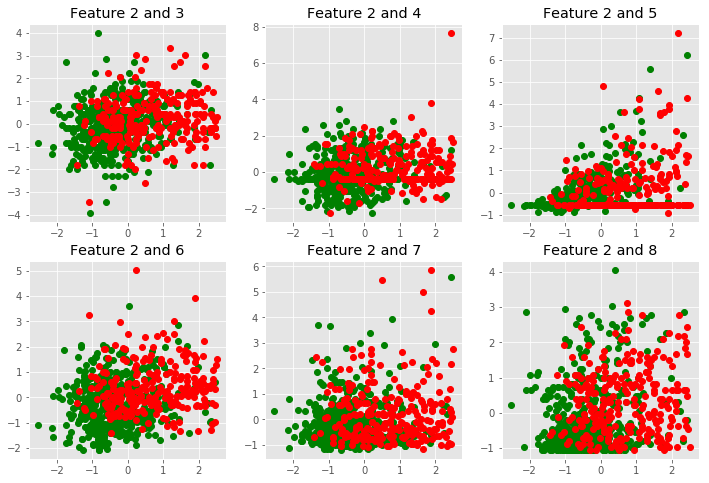

In [116]:
#Glucose
colors = ['g','r']

f,ax = plt.subplots(2,3,figsize=(12,8))

comb = combinations(feature_names, 2)
    
ax[0][0].set_title('Feature 2 and 3')
ax[0][1].set_title('Feature 2 and 4')
ax[0][2].set_title('Feature 2 and 5')
ax[1][0].set_title('Feature 2 and 6')
ax[1][1].set_title('Feature 2 and 7')
ax[1][2].set_title('Feature 2 and 8')


for c in np.unique(y):
    ax[0][0].plot(f2[y==c],f3[y==c],'o',color=colors[int(c)])
    ax[0][1].plot(f2[y==c],f4[y==c],'o',color=colors[int(c)])
    ax[0][2].plot(f2[y==c],f5[y==c],'o',color=colors[int(c)])
    ax[1][0].plot(f2[y==c],f6[y==c],'o',color=colors[int(c)])
    ax[1][1].plot(f2[y==c],f7[y==c],'o',color=colors[int(c)])
    ax[1][2].plot(f2[y==c],f8[y==c],'o',color=colors[int(c)])


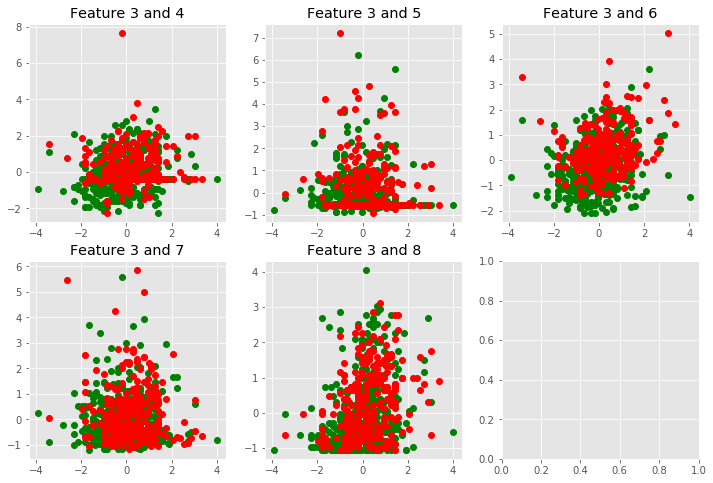

In [117]:
#BP
colors = ['g','r']

f,ax = plt.subplots(2,3,figsize=(12,8))

comb = combinations(feature_names, 2)
    
ax[0][0].set_title('Feature 3 and 4')
ax[0][1].set_title('Feature 3 and 5')
ax[0][2].set_title('Feature 3 and 6')
ax[1][0].set_title('Feature 3 and 7')
ax[1][1].set_title('Feature 3 and 8')


for c in np.unique(y):
    ax[0][0].plot(f3[y==c],f4[y==c],'o',color=colors[int(c)])
    ax[0][1].plot(f3[y==c],f5[y==c],'o',color=colors[int(c)])
    ax[0][2].plot(f3[y==c],f6[y==c],'o',color=colors[int(c)])
    ax[1][0].plot(f3[y==c],f7[y==c],'o',color=colors[int(c)])
    ax[1][1].plot(f3[y==c],f8[y==c],'o',color=colors[int(c)])

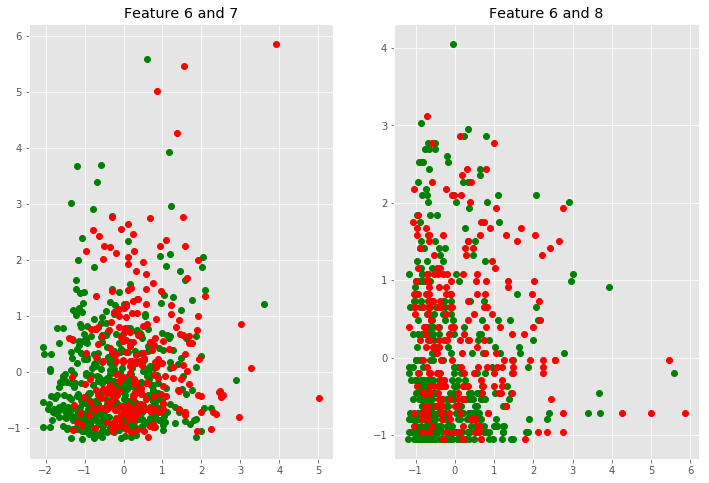

In [120]:
#BMI
colors = ['g','r']

f,ax = plt.subplots(1,2,figsize=(12,8),squeeze=False)
    
ax[0][0].set_title('Feature 6 and 7')
ax[0][1].set_title('Feature 6 and 8')


for c in np.unique(y):
    ax[0][0].plot(f6[y==c],f7[y==c],'o',color=colors[int(c)])
    ax[0][1].plot(f7[y==c],f8[y==c],'o',color=colors[int(c)])
    

<h3>Model</h3>

<h3>built in knn</h3>

In [251]:
X_knn=df[feature_names]


### splitting data (80:20)% & test

In [247]:
#train-0.8 test-0.2
X_train,X_test,y_train,y_test = train_test_split(X_knn, y, test_size=0.2, random_state=10)
print(X_train.shape)
print(X_test.shape)

(579, 8)
(145, 8)


In [224]:
#knn clasifier with k=3
start=time.time()
classifier = KNeighborsClassifier(n_neighbors=3)  
classifier.fit(X_train, y_train)
#predict with test data
y_pred = classifier.predict(X_test)  
end=time.time()

In [63]:
classifier.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [225]:
#accuracy 
acc=accuracy_score(y_test,y_pred)
acc

0.7517241379310344

In [226]:
print(end-start)

0.009006500244140625


### Evaluation Metrics

In [227]:
 #print confusion matrix
print('Confusion Matrix : \n',confusion_matrix(y_test, y_pred))  

#precision-What percent of your predictions were correct?
print("Precision score: {}".format(precision_score(y_test,y_pred)))

#Recall – What percent of the positive cases did you catch?
print("Recall score: {}".format(recall_score(y_test,y_pred)))

#F1 score – What percent of positive predictions were correct? 
print("F1 score: {}".format(f1_score(y_test,y_pred)))
  

Confusion Matrix : 
 [[85 12]
 [24 24]]
Precision score: 0.6666666666666666
Recall score: 0.5
F1 score: 0.5714285714285715


<h3> 5. Pros and cons </h3>


<hr><b>Pros</b> : <br> <hr>
I) Intuitive and simple<br>
II) No assumptions about data<br>
III) Does not require an explicit training step<br>
IV) One Hyper Parameter needed<br>
V) Adaptive in learning<br>
VI) Variety of distance criteria to be choosen from

<hr><hr>
<b>Cons</b>: <br><hr>
I) Memory Intensive<br>
II) Sensitive to outliers<br>
III) Need to handle missing data<br>
IV) Sensitive to lots of irrelevant attributes<br>
V) Needs homogenous features<br><hr>

<h3> 6. Optimization  
</h3>


1) Choose value of k appropriately.<br>
2) Perform feature selection prior to application of KNN model<br>


### Parameter tuning using Cross validation

In [235]:
#train-0.8 test-0.2
X_train1,X_val,y_train1,y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=10)
print(X_train1.shape)
print(X_val.shape)

(463, 8)
(116, 8)


[0.76068376 0.67241379 0.80172414 0.65217391 0.71304348]
0.7200078166045183
1 0.6595117825702534
2 0.6769620318046105
3 0.7027209472186984
4 0.7149245889875575
5 0.7200078166045183
6 0.7184028498571227
7 0.7218069170542935
8 0.7270835095272876
9 0.7563351657504581
10 0.7512072169043682
11 0.7598581478491523
12 0.7615520444905752
13 0.7616714719563296
14 0.7667694357949231
15 0.7564988018811107
16 0.7650300490780251
17 0.7667546995732903
18 0.7684638450005766
19 0.7633361524366021
20 0.7581037686285061
21 0.7736665000832916
22 0.7615672932764388
23 0.7650305616422558
24 0.7581187611322544
25 0.7581337536360025
26 0.7598876202924179
27 0.7598431553454043
28 0.7615970220018197
29 0.7632916874895885
30 0.7719723471597535


Text(0, 0.5, 'Cross-Validated Accuracy')

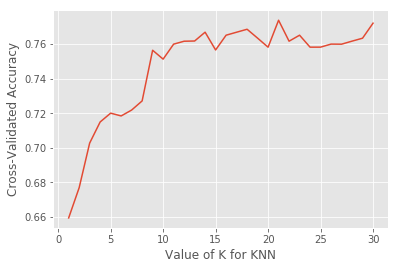

In [254]:
#######with all features 
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn,X_train,y_train,cv=5,scoring='accuracy')
print(scores)
print(scores.mean())
###################################all k
k_range = range(1,31)
k_scores = []
for k_number in k_range:
    knn = KNeighborsClassifier(n_neighbors=k_number)
    scores = cross_val_score(knn,X_train,y_train,cv=5,scoring='accuracy')
    k_scores.append(scores.mean())
    print(k_number,scores.mean())
# print(np.max(k_scores))
plt.plot(k_range,k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

#### Concluded that k=21 gives max cross validation accuracy

In [ ]:
## Prediction with new testdata

In [199]:
#scaling the new features
Y_new=[0, 90, 110, 35, 12, 22.5, 0.15 ,57]
new=np.reshape(Y_new, (8,1)).T
scaler = StandardScaler()  
scaler.fit(new)

X_scaled_new = scaler.transform(new) 

In [203]:
#applying the classifiwr
knn1 = KNeighborsClassifier(n_neighbors=21)#k=21
knn1.fit(X_train, y_train)
#predict with test data
y_pred1 = knn1.predict(X_scaled_new)
y_pred1


array([0], dtype=int64)

In [123]:
#knn clasifier with k=21

classifier = KNeighborsClassifier(n_neighbors=21)  
classifier.fit(X_train, y_train)
#predict with test data
y_pred = classifier.predict(X_test)  


In [69]:
classifier.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 14,
 'p': 2,
 'weights': 'uniform'}

In [124]:
#accuracy 
acc=accuracy_score(y_test,y_pred)
acc

0.7862068965517242

78% accuracy with k = 21

### Feature Selection

In [46]:
#with different features 


In [328]:
#bmi,glucose

X_BG_train=X_train.iloc[:,[1,5]]
X_BG_test=X_test.iloc[:,[1,5]]

start=time.time()
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_BG_train, y_train)
#predict with test data
y_pred = knn.predict(X_BG_test)  
end=time.time()
acc=accuracy_score(y_test,y_pred)

print("Acuracy is :",np.round(acc*100,2))
print("Time taken: " ,(end-start)*1000,'ms')


Acuracy is : 68.28
Time taken:  5.994319915771484 ms


In [320]:
#bmi,glucose,age

X_BGA_train=X_train.iloc[:,[1,5,7]]
X_BGA_test=X_test.iloc[:,[1,5,7]]

start=time.time()
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_BGA_train, y_train)
#predict with test data
y_pred = knn.predict(X_BGA_test)  
end=time.time()
acc=accuracy_score(y_test,y_pred)
print("Acuracy is :",np.round(acc*100,2))
print("Time taken: " ,(end-start)*1000,'ms')


Acuracy is : 73.1
Time taken:  6.020545959472656 ms


In [315]:
#bmi,glucose,age,pedi

X_BGAB_train=X_train.iloc[:,[1,5,7,2]]
X_BGAB_test=X_test.iloc[:,[1,5,7,2]]

start=time.time()
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_BGAP_train, y_train)
#predict with test data
y_pred = knn.predict(X_BGAP_test)  
end=time.time()
acc=accuracy_score(y_test,y_pred)
print("Acuracy is :",np.round(acc*100,2))
print("Time taken: " ,(end-start)*1000,'ms')

Acuracy is : 74.48
Time taken:  6.99162483215332 ms


In [313]:
#bmi,bp,pedi,preg

X_BBPP_train=X_train.iloc[:,[5,2,0,6]]
X_BBPP_test=X_test.iloc[:,[5,2,0,6]]

start=time.time()
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_BBPP_train, y_train)
#predict with test data
y_pred = knn.predict(X_BBPP_test)  
end=time.time()
acc=accuracy_score(y_test,y_pred)
print("Acuracy is :",np.round(acc*100,2))
print("Time taken: " ,(end-start)*1000,'ms')

Acuracy is : 63.45
Time taken:  7.004737854003906 ms


In [314]:
#bmi,bp,glucose,pedi,preg

X_BBGPP_train=X_train.iloc[:,[1,5,2,6,0]]
X_BBGPP_test=X_test.iloc[:,[1,5,2,6,0]]

start=time.time()
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_BBGPP_train, y_train)
#predict with test data
y_pred = knn.predict(X_BBGPP_test)  
end=time.time()
acc=accuracy_score(y_test,y_pred)
print("Acuracy is :",np.round(acc*100,2))
print("Time taken: " ,(end-start)*1000,'ms')

Acuracy is : 73.1
Time taken:  7.0171356201171875 ms


In [308]:
#bmi,glucose,age,pedi,preg,BP

X_BGAPPB_train=X_train.iloc[:,[1,5,7,6,0,2]]
X_BGAPPB_test=X_test.iloc[:,[1,5,7,6,0,2]]

start=time.time()
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_BGAPPB_train, y_train)
#predict with test data
y_pred = knn.predict(X_BGAPPB_test)  
end=time.time()
acc=accuracy_score(y_test,y_pred)
print("Acuracy is :",np.round(acc*100,2))
print("Time taken: " ,(end-start)*1000,'ms')

Acuracy is : 73.79
Time taken:  7.017850875854492 ms


In [369]:
#bp,st,ins,bmi,pedi

X_n_train=X_train.iloc[:,[2,3,4,5,6]]
X_n_test=X_test.iloc[:,[2,3,4,5,6]]

start=time.time()
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_n_train, y_train)
#predict with test data
y_pred = knn.predict(X_n_test)  
end=time.time()
acc=accuracy_score(y_test,y_pred)
print("Acuracy is :",np.round(acc*100,2))
print("Time taken: " ,(end-start)*1000,'ms')

Acuracy is : 64.83
Time taken:  8.018255233764648 ms


In [307]:
#bmi,glucose,age,pedi,preg

X_BGAPP_train=X_train.iloc[:,[1,5,7,6,0]]
X_BGAPP_test=X_test.iloc[:,[1,5,7,6,0]]

start=time.time()
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_BGAPP_train, y_train)
#predict with test data
y_pred = knn.predict(X_BGAPP_test)  
end=time.time()
acc=accuracy_score(y_test,y_pred)
print("Acuracy is :",np.round(acc*100,2))
print("Time taken: " ,(end-start)*1000,'ms')

Acuracy is : 78.62
Time taken:  7.004737854003906 ms


#### Testing with selected features and taking k as 21

In [334]:
#bmi,glucose,age,pedi,preg
X_BGAPP_train=X_train.iloc[:,[1,5,7,6,0]]
X_BGAPP_test=X_test.iloc[:,[1,5,7,6,0]]

start=time.time()
knn = KNeighborsClassifier(n_neighbors=21)#k=21
knn.fit(X_BGAPP_train, y_train)
#predict with test data
y_pred = knn.predict(X_BGAPP_test)
# print('Prediction: {}'.format(y_pred))
end=time.time()
acc=accuracy_score(y_test,y_pred)
print("Acuracy is :",np.round(acc*100,2))
print("Time taken: " ,(end-start)*1000,'ms')

Acuracy is : 80.69
Time taken:  8.004903793334961 ms


In [335]:
print('Confusion Matrix : \n',confusion_matrix(y_test, y_pred))  


Confusion Matrix : 
 [[90  7]
 [21 27]]


#### Accuracy of the model with only selected features and k= 21 is 81%

### 7. Inferences

1) Data needs to be cleaned and scaled before applying the model.<br>
2) Accuracy of the model depends on feature selection and the proper selection of hyperparameter k.<br>
3) Works well with binary class problem.<br>